<a href="https://colab.research.google.com/github/julianafalves/Clustering_model/blob/main/Trabalho2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Italo Carvalho Vianelli Ribeiro RA:769687**  
 
**Juliana Ferreira Alves          RA:744794**






Primeiramente, foi importado a biblioteca "pandas" e o objeto "KMeans" da biblioteca "sklearn.cluster" que serão necessárias para a realização do trabalho.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

Em sequencia foi realizado a leitura de dados do dataset com a função read_csv da biblioteca pandas que nos permite ler dados de um arquivo CSV.

In [ ]:
dados = pd.read_csv('/content/drive/My Drive/IA/Dresses_Attribute_Sales.rar (Unzipped Files)/Dresses_Attribute_Sales/car.csv')

**Informações sobre o dataset:**  

Valores de atributos:

  * buying:       v-high, high, med, low
  * maint:        v-high, high, med, low
  * doors:        2, 3, 4, 5-more
  * persons:      2, 4, more
  * lug_boot:     small, med, big
  * safety:       low, med, high 

Valores de classe:  

   * class:  unacc, acc, good, v-good      


Posteriormente utilizamos o método .head() para visualizarmos as colunas e os 5 primeiras linhas de dados do dataset, para em seguida retirar a coluna "class" referente as classes através do método .drop().

In [ ]:
dados.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
dados_sem_classe=dados.drop(columns='class') #metodo
dados_sem_classe.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


Sequencialmente utilizamos a função, da biblioteca pandas, get_dummies para realizar a transformação de atributos categoricos em atributos binarios, essa prática é conhecida também como one-hot encoding.

In [ ]:
dados_sem_classe = pd.get_dummies(dados_sem_classe) 
dados_sem_classe.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


Assim como feito no ínicio do trabalho, fizemos a importações das demais bibliotecas sklearn.metrics e a matplotlib, além do objeto MinMaxScale para realizar as operações e criações de gráficos que serão feitos nesse projeto.

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler




> Parte 1 - Validação com índice externo (Adusted Rand Index)



Sequencialmente, criamos um objeto de kmeans com 2 clusters, e inicialização 
de centróides de forma aleatória para posteriormente aplicarmos o algoritmo com o conjunto de dados sem classe.

In [ ]:
kmeans = KMeans(n_clusters=4,init='random')
kmeans.fit(dados_sem_classe)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

Em seguida, fizemos a avaliação com o índice de validação externo Adusted Rand Index (ARI) usando a função adjusted_rand_score(). Que utiliza os rótulos dos grupos conhecidos utilizados como referência e os clusters gerado pelo agrupamento e retorna um índice de similiaridade.

In [ ]:
sm.adjusted_rand_score(kmeans.labels_,dados['class'])

0.11603551641857276

Também foi feito a inicialização de outro objeto kmeans, que desta vez tem como modo init='k-means++'  

In [ ]:
kmeans2 = KMeans(n_clusters=4,init='k-means++')
kmeans2.fit(dados_sem_classe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
sm.adjusted_rand_score(kmeans2.labels_,dados['class'])

0.2235566047712776

Quanto mais próximo de 1 o Índice Rand, melhor é o agrupamento do modelo. Desta forma pode-se perceber que quando utilizado init igual a k-means++ o modelo se ajustou melhor.


 Ps: Não foi utilizado o objeto MinMaxScale pois não haviam atributos contínuos, apenas categóricos.




































 



> Parte 2 - Encontrar o melhor número de grupos para o
algoritmo KMeans.




Sequecialmente realizamos a determinação do melhor número de grupos usando a soma quadrática das distâncias como índice interno, e para isso primeiramente definimos um intervalo de valores para número de grupos de 1 a 14.

In [ ]:
# Fazer o agrupamento para cada quantidade de grupo no intervalo definido
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

Por fim plotamos o gráfico do número de clusters X índice  

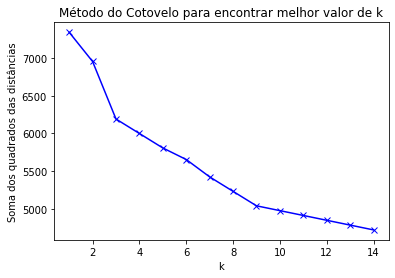

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

Como pode-se observar no gráfico do método do cotovelo, a partir de 4 grupos as quedas não são tão significativas, com uma variação muito pequena do índice, então podemos dizer que o cotovelo do gráfico está no grupo 4, sendo esse o melhor número de clusters para este conjunto de dados.